# OilyGiant

**Meta**
- Encontrar los mejores lugares para abrir 200 pozos nuevos de petróleo
- Crear modelo para predecur el volumen de reservas en pozos nuevos
- Elegir los pozos petroliferos que tienen los valores estimados mas altos.
- Elegir la region con el beneficio total mas alto para los pozos petroliferos seleccionados

**Info**

Tenemos los datos sobre muestras de crudo de tres regiones. Crea un model que ayude a elegir la region con el mayor margen de beneficio. Analizar los beneficios y riesgos potenciales utilizando la tecnica bootstrapping

**Condiciones**

- Solo se debe usar la **regresión lineal** para el entrenamiento del modelo.
- Al explorar la región, se lleva a cabo un estudio de **500 puntos** con la selección de los mejores **200 puntos** para el cálculo del beneficio.
- El presupuesto para el desarrollo de 200 pozos petroleros es de **100 millones** de dolares.
- Un barril de materias primas genera 4.5USD de ingresos. El ingreso de una unidad de producto esde 4500 dolares (el volumen de reservas esta expresado en miles de barriles)
- Despues de la evaluacion de riesgo, maten solo las regiones con riesgo de perdidas inferior al 2.5%. De las que se ajustan a los criterios, se debe seleccionar la región con el beneficio promedio más alto.


## Librerias

In [253]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error


In [254]:
def checkDF(df):
    display(df.sample(5))
    display(df[df.duplicated()])
    display(df.info())
    display(df.describe())
    display(df.isnull().sum())

In [255]:
df_geo0 = pd.read_csv('geo_data_0.csv', index_col='id')
df_geo1 = pd.read_csv('geo_data_1.csv', index_col='id')
df_geo2 = pd.read_csv('geo_data_2.csv', index_col='id')

In [256]:
checkDF(df_geo0)

,f0,f1,f2,product
id,,,,
IVNoQ,2.051748,0.537807,-0.981874,29.295074
sPoOf,-0.668158,0.431008,5.578533,102.529157
DuGFU,-1.080576,0.323059,-0.613793,49.670180
UwtFl,0.025952,0.625666,4.337743,77.278592
CsSyc,-0.965118,0.199516,6.765171,77.766155


,f0,f1,f2,product
id,,,,


<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, txEyH to 1CWhH
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 5.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


f0         0
f1         0
f2         0
product    0
dtype: int64

In [257]:
checkDF(df_geo1)

,f0,f1,f2,product
id,,,,
VFEHa,-9.359457,0.131029,2.997104,84.038886
QSYr6,-2.570004,-4.065170,-0.000508,3.179103
hO1AT,1.955823,-14.847299,5.004288,137.945408
eeSCP,8.330545,-7.966204,0.007711,3.179103
OBPJt,-14.647280,6.526497,0.006118,3.179103


,f0,f1,f2,product
id,,,,


<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, kBEdx to relB0
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 5.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


f0         0
f1         0
f2         0
product    0
dtype: int64

In [258]:
checkDF(df_geo2)

,f0,f1,f2,product
id,,,,
ltxIc,0.434691,-0.704227,-5.432007,35.493873
Ob5GT,2.548363,2.117599,-4.757338,39.861674
L6Pce,0.702180,-0.084870,8.472610,128.143218
kAhOU,1.979957,0.775583,-0.836627,73.834936
mPfZJ,-0.058706,1.095029,-6.003599,20.863848


,f0,f1,f2,product
id,,,,


<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, fwXo0 to V9kWn
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 5.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


f0         0
f1         0
f2         0
product    0
dtype: int64

In [259]:
def graficasGeo(df):
    fig, axes = plt.subplots(1,2, figsize=(12,5))
    
    sns.histplot(data=df['product'],  bins=20, ax=axes[0] )
    axes[0].set_title('Histograma de producto')
    sns.boxplot(data=df['product'], ax=axes[1])
    axes[1].set_title('Box graphic de producto')

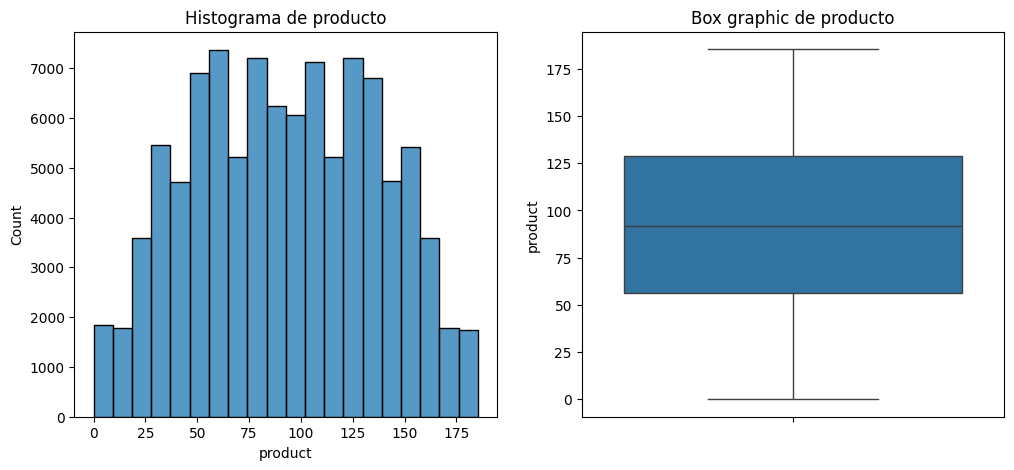

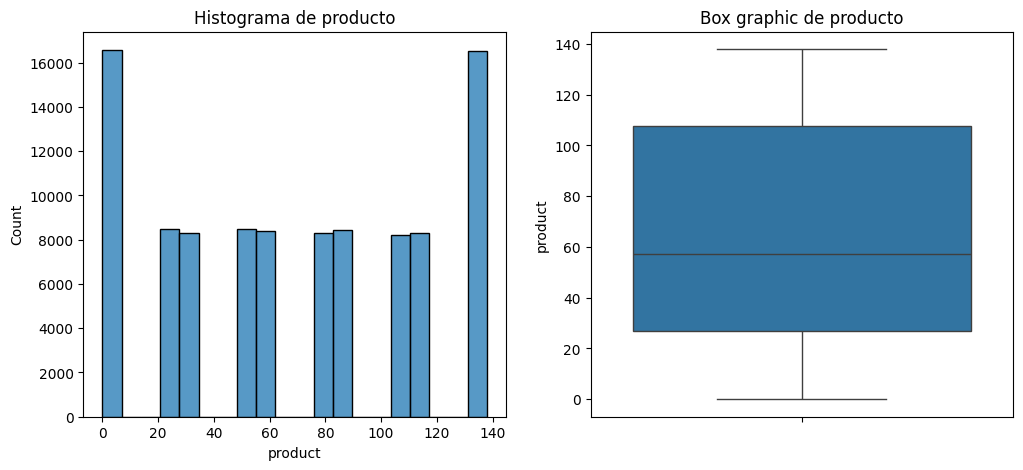

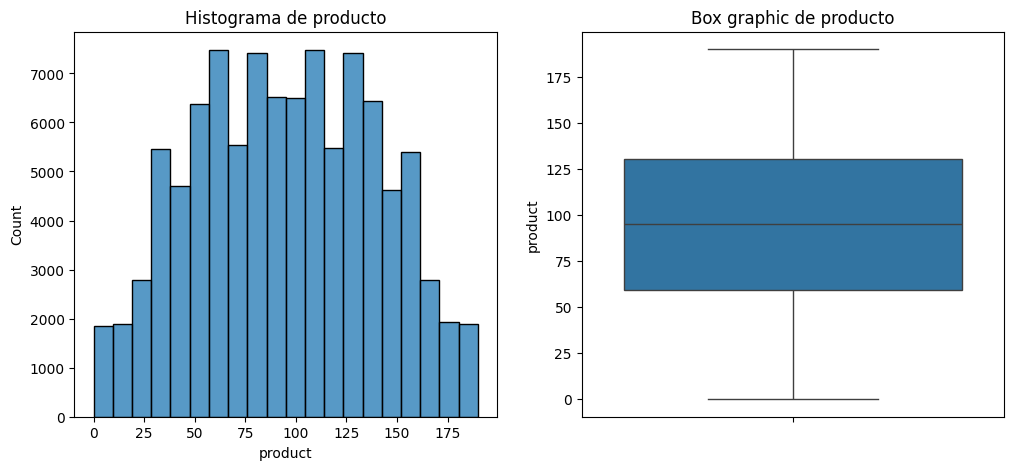

In [260]:
df = [df_geo0,df_geo1,df_geo2]

for i in df:
    graficasGeo(i)

## Modelo de entrenamiento

In [261]:
def modelo(df):
    features_train, features_valid, target_train, target_valid = train_test_split(df.drop('product', axis=1), df['product'], test_size=0.2, random_state=12345)
    model = LinearRegression().fit(features_train,target_train)
    prediction = model.predict(features_valid)
    mse = mean_squared_error(target_valid, prediction)
    rmse = np.sqrt(mse)
    print("El mean squared error: ",mse)
    print("La raiz del error cuadratico medio es: ",rmse)
    return mse, rmse
    

In [262]:
c=0
mse=[]
rmse=[]
for i in df:
    print(f'Geo Data {c}')
    mse1,rmse1 =modelo(i)
    mse.append(mse1)
    rmse.append(rmse1)
    c+=1


Geo Data 0
El mean squared error:  1409.264075716242
La raiz del error cuadratico medio es:  37.540166165272126
Geo Data 1
El mean squared error:  0.7994071428469561
La raiz del error cuadratico medio es:  0.8940957123524059
Geo Data 2
El mean squared error:  1605.2878061221636
La raiz del error cuadratico medio es:  40.06604305546236


Text(0.5, 1.0, 'La raiz del error cuadratico medio')

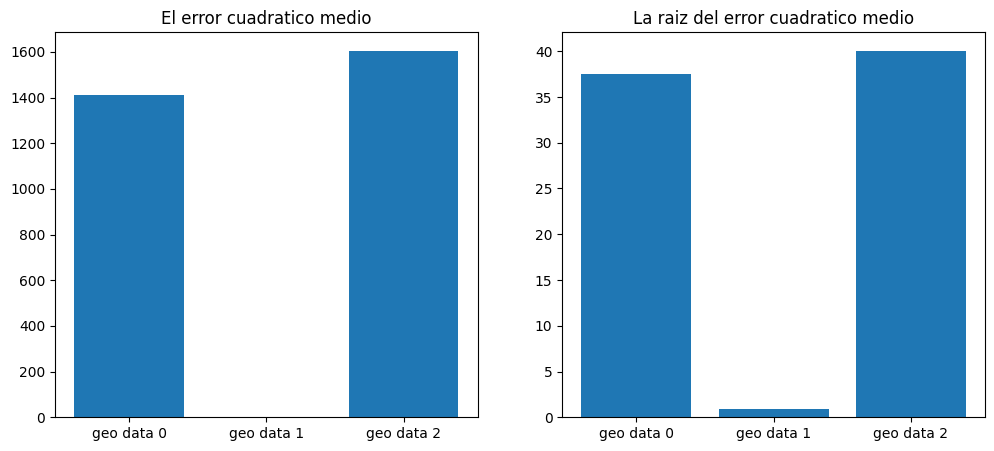

In [263]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

axes[0].bar(['geo data 0','geo data 1','geo data 2'],mse)
axes[0].set_title('El error cuadratico medio')
axes[1].bar(['geo data 0','geo data 1','geo data 2'],rmse)
axes[1].set_title('La raiz del error cuadratico medio')


## Funcion para calcular la ganancia de los pozos

In [264]:
def gananciatotal(df):
    volumen=df['product'].sort_values(ascending=False)[:200].sum()
    total = volumen*1000*4500
    return total

In [265]:
ganancias = []
gananciasSuma = []
for i in df:
    ganancias.append(gananciatotal(i))
    
    

In [266]:
ganancias

[166350365680.82407, 124150866966.81511, 170596329283.5898]

<BarContainer object of 3 artists>

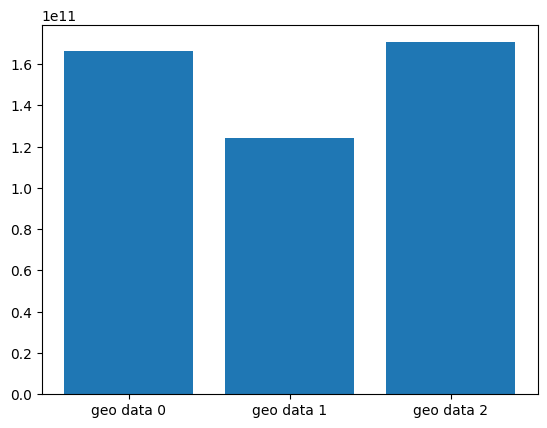

In [267]:
plt.bar(['geo data 0','geo data 1','geo data 2'],ganancias)


La Region 2 presenta una mayor ganancia de ahi la Region 0. Estas dos regiones han mostrado tener una media muy similar de producto, mas aparte que el sistema de regresion lineal es mas acertado con estas dos regiones.

## Calculo de Riesgo y ganancias para cada Region

In [268]:
def calculoDeRiesgo (ds):
    ds = ds['product'].sort_values(ascending=False)[:200]
    state = np.random.RandomState(12345)
    values = []
    for i in range(1000):
        subsample =ds.sample(frac=1, replace=True, random_state=state)
        values.append(subsample.quantile(0.99))
    
    values = pd.Series(values)

    lower = values.quantile(0.05)
    upper = values.quantile(0.95)
    return lower, upper

In [269]:

lowerUpper = []
for i in df:
    l,u = calculoDeRiesgo(i)
    lowerUpper.append(l)
    lowerUpper.append(u)

In [270]:
lowerUpperDF = pd.DataFrame({'Values':lowerUpper,'Geo':['Geo Data 0', 'Geo Data 0','Geo Data 1', 'Geo Data 1','Geo Data 2', 'Geo Data 2'],'Type':['Lower','Upper','Lower','Upper','Lower','Upper']})

In [271]:
lowerUpperDF

,Values,Geo,Type
0,185.338542,Geo Data 0,Lower
1,185.364347,Geo Data 0,Upper
2,137.945408,Geo Data 1,Lower
3,137.945408,Geo Data 1,Upper
4,189.988427,Geo Data 2,Lower
5,190.029838,Geo Data 2,Upper


<Axes: xlabel='Geo', ylabel='Values'>

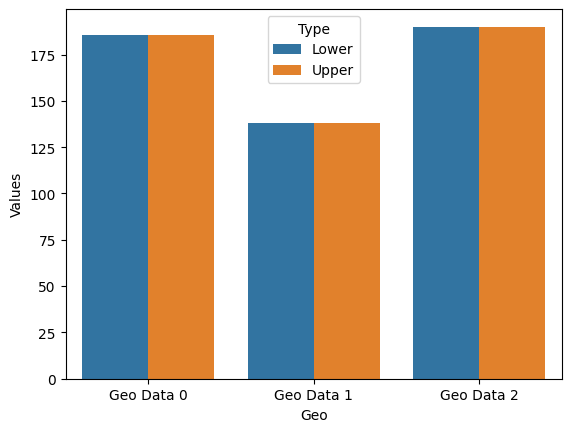

In [272]:
sns.barplot(x='Geo',y='Values',hue='Type',data=lowerUpperDF)


## Conclusion

Como podemos observar los margenes de perdida de la Region 2 y 0 son bajos, podemos observar que las probabiloidades de tener ganancias son altas, aparte sus base de datos hace que sea mas facil y predecible la cantiadd de producto ya que sus errores son menores al de la region 1.

Hola